## Imports

In [1]:
import os
import pathlib
import pandas as pd

import subprocess
import threading

import pathlib
import torch
import torchvision
import ultralytics

import preprocessing
from matplotlib import pyplot as plt

In [7]:
if "yolov5" in pathlib.Path.cwd().parts:
  while "yolov5" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('yolov5').exists():
  !git clone --depth 1 https://github.com/ultralytics/yolov5

In [ ]:
!cp yolov5/data/VOC.yaml yolov5/VOC.yaml 

In [ ]:
device = 'cuda'
boxes = torch.tensor([[0., 1., 2., 3.]]).to(device)
scores = torch.randn(1).to(device)
iou_thresholds = 0.5

print(torchvision.ops.nms(boxes, scores, iou_thresholds))

In [4]:
ultralytics.checks()

Ultralytics YOLOv8.2.59  Python-3.9.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
Setup complete  (12 CPUs, 15.9 GB RAM, 215.9/222.3 GB disk)


## 1. Create Dataset

In [6]:
# Klassenamen
classes = ["1", "2", "3", "4", "5"]

In [8]:
os.chdir('../')

In [12]:
annotation_dir_test = "./yoloNoUnkData/Test/Annotations/"
annotation_dir_train = "./yoloNoUnkData/Train/Annotations/"

In [11]:
preprocessing.convert_voc_to_yolo(annotation_dir=annotation_dir_test, output_dir=annotation_dir_test, class_names=classes)

In [13]:
preprocessing.convert_voc_to_yolo(annotation_dir=annotation_dir_train, output_dir=annotation_dir_train, class_names=classes)

## 2. Training  

In [9]:
os.chdir('./yolov5')
#cd ./yolov5 # Go into yolov5 directory

In [4]:
!python train.py --img 640 --batch 8 --epochs 50 --data noUnkVOC.yaml --weights yolov5l.pt --workers 2 --project ../yoloTrainNoUnk/ --name yolo5large50E640 --patience 10

^C


In [6]:
!python train.py --img 320 --batch 32 --epochs 50 --data myVOC.yaml --weights ../yoloTrain/yolo5large50E320I/weights/last.pt --workers 2 --project ../yoloTrain/ --name yolo5large50E320I --patience 5

train: weights=../yoloTrain/yolo5large50E320I/weights/last.pt, cfg=, data=myVOC.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=../yoloTrain/, name=yolo5large50E320I, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=5, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  12be499 Python-3.9.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weigh

In [10]:
!python val.py --img 640 --data noUnkVOC.yaml --weights ../yoloTrainNoUnk/yolo5large50E640/weights/best.pt --workers 1 --project ../yoloTrainNoUnk/ --name yolo5large50E640 

val: data=noUnkVOC.yaml, weights=['../yoloTrainNoUnk/yolo5large50E640/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=1, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=../yoloTrainNoUnk/, name=yolo5large50E640, exist_ok=False, half=False, dnn=False
YOLOv5  12be499 Python-3.9.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)

Fusing layers... 
Model summary: 267 layers, 46129818 parameters, 0 gradients, 107.7 GFLOPs

val: Scanning C:\Users\Alexej\Desktop\GTSRB\yoloNoUnkData\Test\labels.cache... 2790 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2790/2790 [00:00<?, ?it/s]
val: Scanning C:\Users\Alexej\Desktop\GTSRB\yoloNoUnkData\Test\labels.cache... 2790 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2790/2790 [00:00<?, ?it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%

## 3. Videoinference

In [5]:
os.chdir('./yolov5') 

In [4]:
f"python detect.py --img=img_size\
    --device=0 --source=../videoInferenceData/15FPS_singleRow/15FPS_singleRow_test1.mp4 \
    --weights=../yoloTrainNoUnk/yolo5large50E640/weights/best.pt \
    --project=../videoInferenceData/ \
    --name=yoloTrainNoUnk/15FPS_singleRow/15FPS_singleRow_test1/yolo5large50E640_1280 \
    --conf-thres=0.35"

'python detect.py --img=img_size    --device=0 --source=../videoInferenceData/15FPS_singleRow/15FPS_singleRow_test1.mp4     --weights=../yoloTrainNoUnk/yolo5large50E640/weights/best.pt     --project=../videoInferenceData/     --name=yoloTrainNoUnk/15FPS_singleRow/15FPS_singleRow_test1/yolo5large50E640_1280     --conf-thres=0.35'

In [13]:
VIDEO_NAME = "30FPS_closeup_tracking_allClassesAndUnk"
img_size = 1280 # Image size

HAS_UNKNOWN = False
CONFIDENCE = 0.42

if HAS_UNKNOWN:
    model_type = "yoloTrain"
else:
    model_type = "yoloTrainNoUnk"

In [14]:
model_names = [
    "yolo5small50E320I",
    "yolo5small50E640I2",
    "yolo5small50E1280I",
    "yolo5medium50E640",
    "yolo5large50E640",
    "yolo5medium50E640I",
    "yolo5medium50E320I"]

weights_template = '../{type}/{name}/weights/best.pt' # Path to the trained weights. Use best.pt or last.pt
save_dir_template = '{type}/{video}/{name}_{img}' # Path to the save directory
video_path = '../videoInferenceData/30FPS_Closeup/{video}.mp4'.format(video=VIDEO_NAME) # Path to the video.mp4

os.makedirs("../myModules/yoloLog/", exist_ok=True) # Directory in which the logs will be saved.

In [15]:
def stream_reader(pipe, buffer, file):
    with pipe:
        for line in iter(pipe.readline, b''):
            line = line.decode('utf-8')
            buffer.append(line)
            print(line.strip())
            file.write(line)

def evaluate_model(model_name):
    weights_path = weights_template.format(name=model_name, type=model_type)
    save_dir = save_dir_template.format(type=model_type, video=VIDEO_NAME, name=model_name, img=img_size)

    command = f"python C:\\Users\\Alexej\\Desktop\\GTSRB\\yolov5\\detect.py \
                --img={img_size} \
                --device=0 \
                --source={video_path} \
                --weights={weights_path} \
                --project=../videoInferenceData/ \
                --name={save_dir} \
                --conf-thres={CONFIDENCE}"

    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)

    stdout_buffer = []
    stderr_buffer = []

    result_file_path = os.path.join("../myModules/yoloLog/", f"{model_name}_{img_size}_{VIDEO_NAME}_evaluation_results.txt")
    with open(result_file_path, "w") as result_file:
        stdout_thread = threading.Thread(target=stream_reader, args=(process.stdout, stdout_buffer, result_file))
        stderr_thread = threading.Thread(target=stream_reader, args=(process.stderr, stderr_buffer, result_file))

        stdout_thread.start()
        stderr_thread.start()

        process.wait()

        stdout_thread.join()
        stderr_thread.join()

    if process.returncode != 0:
        error_message = ''.join(stderr_buffer)
        print(f"Error evaluating model {model_name}: {error_message.strip()}")
        return error_message.strip()
    else:
        output_str = ''.join(stdout_buffer)
        print(f"Evaluation results for {model_name} saved to {result_file_path}")
        return output_str.strip()

# Main loop
for model_name in model_names:
    print(f"Evaluating model: {model_name}")
    evaluate_model(model_name)

Evaluating model: yolo5small50E320I
detect: weights=['../yoloTrainNoUnk/yolo5small50E320I/weights/best.pt'], source=../videoInferenceData/30FPS_Closeup/30FPS_closeup_tracking_allClassesAndUnk.mp4, data=data\coco128.yaml, imgsz=[1280, 1280], conf_thres=0.42, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../videoInferenceData/, name=yoloTrainNoUnk/30FPS_closeup_tracking_allClassesAndUnk/yolo5small50E320I_1280, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  12be499 Python-3.9.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)

Fusing layers...
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/6464) C:\Users\Alexej\Desktop\GTSRB\videoInferenceData\30FPS_Closeup\30FPS_closeup_tracking_allClassesAndUnk.mp

In [7]:
!python detect.py --img 1280 --device 0 --source ../videoInferenceData/multiRow/mixClassNoBackroundSlowToFast.mp4  --weights ../yoloTrainNoUnk/yolo5medium50E320I/weights/best.pt --project ../videoInferenceData/ --name yoloTrainNoUnk/re/yolo5medium50E320I_1280 --conf-thres 0.35

detect: weights=['../yoloTrainNoUnk/yolo5medium50E320I/weights/best.pt'], source=../videoInferenceData/multiRow/mixClassNoBackroundSlowToFast.mp4, data=data\coco128.yaml, imgsz=[1280, 1280], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../videoInferenceData/, name=yoloTrainNoUnk/re/yolo5medium50E320I_1280, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  12be499 Python-3.9.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)

Fusing layers... 
Model summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/2021) C:\Users\Alexej\Desktop\GTSRB\videoInferenceData\multiRow\mixClassNoBackroundSlowToFast.mp4: 736x1280 (no detections), 73.9ms
video 1/1 (2/2021) C:\Users\Alexej\Desktop\GTSRB\videoInference

## 3. Evaluation

### 3.1 Video evaluation

In [5]:
!python detect.py --source 0  --weights ../yoloTrainNoUnk/yolo5small50E1280I2/weights/best.pt --img 1280 --conf-thres 0.5

detect: weights=['../yoloTrainNoUnk/yolo5small50E1280I2/weights/best.pt'], source=0, data=data\coco128.yaml, imgsz=[1280, 1280], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  12be499 Python-3.9.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
1/1: 0...  Success (inf frames 640x480 at 30.00 FPS)

0: 960x1280 (no detections), 1326.6ms
0: 960x1280 (no detections), 19.0ms
0: 960x1280 (no detections), 17.0ms
0: 960x1280 (no detections), 17.0ms
0: 960x1280 (no detections), 18.5ms
0: 960x1280 (no detections), 16.0ms
0: 960x1280 (no detections), 15.5ms
0: 960x1280 (n

FPS = 1000ms / (11.3ms ) = 88.5 FPS
Speed: 0.4ms pre-process, 9.0ms inference, 1.9ms NMS per image at shape (1, 3, 320, 320)

### 3.2 Simple Image-Detection 

In [ ]:
!python detect.py --source ../yoloData/Test/images --weights ./runs/train/exp8/weights/last.pt --img 320 --save-txt --save-conf --line-thickness 1

## 4. Plots

In [2]:
MODEL_NAME = "yolo5medium50E320I"
results_csv_path = f'./yoloTrainNoUnk/{MODEL_NAME}/results.csv'
df = pd.read_csv(results_csv_path)

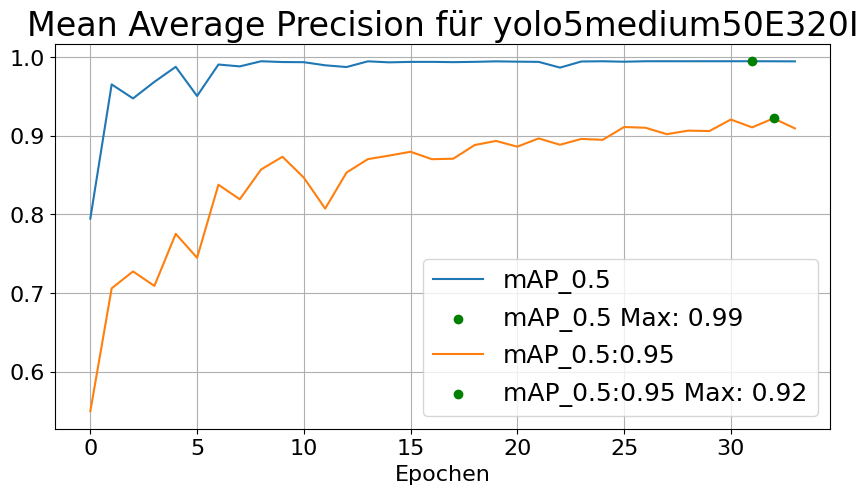

In [3]:
max_map_0_5 = df['     metrics/mAP_0.5'].max()
max_map_0_5_to_0_95 = df['metrics/mAP_0.5:0.95'].max()

max_index_05 = df['     metrics/mAP_0.5'].idxmax()
max_index_95 = df['metrics/mAP_0.5:0.95'].idxmax()

plt.figure(figsize=(10, 5))
plt.plot(df['               epoch'], df['     metrics/mAP_0.5'], label='mAP_0.5')
plt.scatter(df['               epoch'].iloc[max_index_05], max_map_0_5, color='green', zorder=5, label=f'mAP_0.5 Max: {max_map_0_5:.2f}')
plt.plot(df['               epoch'], df['metrics/mAP_0.5:0.95'], label='mAP_0.5:0.95')
plt.scatter(df['               epoch'].iloc[max_index_95], max_map_0_5_to_0_95, color='green', zorder=5, label=f'mAP_0.5:0.95 Max: {max_map_0_5_to_0_95:.2f}')

plt.xlabel('Epochen', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(f'Mean Average Precision für {MODEL_NAME}', fontsize=24)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

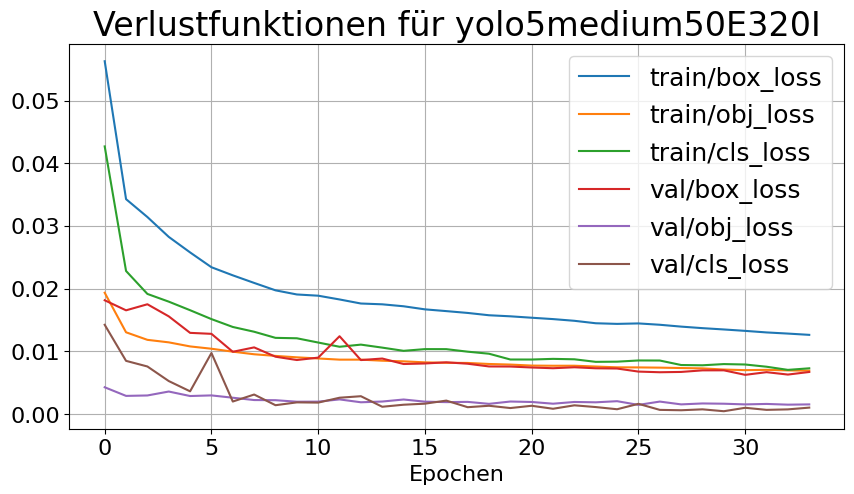

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df['               epoch'], df['      train/box_loss'], label='train/box_loss')
plt.plot(df['               epoch'], df['      train/obj_loss'], label='train/obj_loss')
plt.plot(df['               epoch'], df['      train/cls_loss'], label='train/cls_loss')
plt.plot(df['               epoch'], df['        val/box_loss'], label='val/box_loss')
plt.plot(df['               epoch'], df['        val/obj_loss'], label='val/obj_loss')
plt.plot(df['               epoch'], df['        val/cls_loss'], label='val/cls_loss')
plt.xlabel('Epochen', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(f'Verlustfunktionen für {MODEL_NAME}', fontsize=24)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

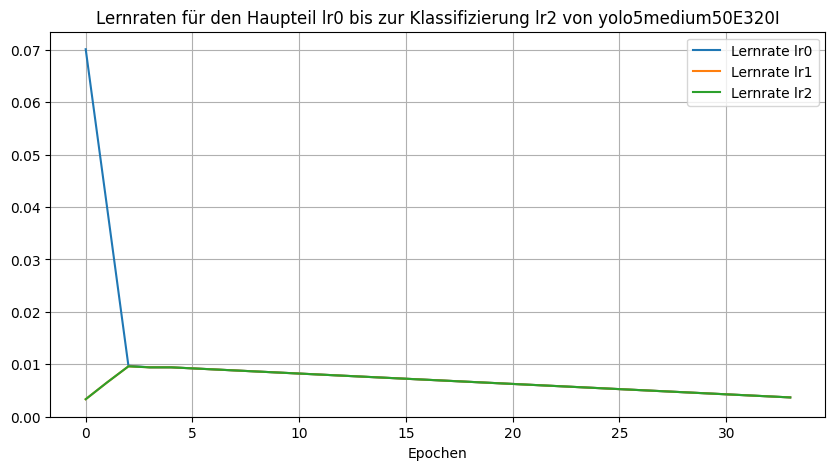

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df['               epoch'], df['               x/lr0'], label='Lernrate lr0')
plt.plot(df['               epoch'], df['               x/lr1'], label='Lernrate lr1')
plt.plot(df['               epoch'], df['               x/lr2'], label='Lernrate lr2')
plt.xlabel('Epochen')
plt.title(f'Lernraten für den Haupteil lr0 bis zur Klassifizierung lr2 von {MODEL_NAME}')
plt.legend()
plt.grid(True)
plt.show()